# PyBer_Challenge

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Technical Analysis Deliverable 1

In [43]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [30]:
cities = pyber_data_df['city'].unique()
print(cities)


['Lake Jonathanshire' 'South Michelleport' 'Port Samanthamouth'
 'Rodneyfort' 'South Jack' 'South Latoya' 'New Paulville' 'Simpsonburgh'
 'South Karenland' 'North Jasmine' 'New Kimberlyborough' 'West Angela'
 'Roberthaven' 'North Jason' 'Williamsview' 'Leahton' 'West Anthony'
 'New Paulton' 'West Patrickchester' 'Deanville' 'West Josephberg'
 'West Samuelburgh' 'West Heidi' 'Loganberg' 'Huntermouth' 'Grahamburgh'
 'Port Frank' 'East Kaylahaven' 'West Robert' 'North Markport'
 'Richardfort' 'Reynoldsfurt' 'Justinberg' 'Martinezhaven' 'Jerryton'
 'Lake Scottton' 'South Evanton' 'Rogerston' 'West Ericstad' 'Hurleymouth'
 'Joneschester' 'Port Angela' 'Barajasview' 'West Christopherberg'
 'New Jacobville' 'Port David' 'Valentineton' 'Carriemouth' 'Williamsstad'
 'Royland' 'Karenberg' 'Christopherfurt' 'Liumouth' 'Johnton' 'Erikaland'
 'Raymondhaven' 'Karenside' 'Lake Danielberg' 'South Phillip'
 'North Madeline' 'Port Johnbury' 'Robertport' 'Pattyland' 'Amandaburgh'
 'North Barbara' 'West G

NameError: name 'count' is not defined

In [38]:
# Count how many sightings have occured within each state
city_counts = pyber_data_df['city'].value_counts()
city_counts.head(50)

West Angela             39
South Karenland         38
North Jason             35
Port Frank              33
Liumouth                33
South Evanton           31
South Phillip           31
South Michelleport      31
West Robert             31
West Anthony            30
Royland                 30
North Jasmine           30
New Kimberlyborough     30
Justinberg              30
East Kaylahaven         29
Karenside               28
Richardfort             28
West Heidi              28
Hurleymouth             28
Loganberg               28
Josephside              27
Carriemouth             27
Christopherfurt         27
East Marymouth          27
West Christopherberg    26
Lake Danielberg         26
West Josephberg         26
Joneschester            25
West Samuelburgh        25
Raymondhaven            25
Jerryton                25
Port Samanthamouth      25
North Madeline          25
Lake Robertside         25
Grahamburgh             25
Lake Jonathanshire      24
Huntermouth             24
R

In [57]:
#Find the total number of drivers per city type
pyber_driver_sum = pyber_data_df.groupby(["city"]).mean()['driver_count']
pyber_driver_sum

city
Amandaburgh         12.0
Barajasview         26.0
Barronchester       11.0
Bethanyland         22.0
Bradshawfurt         7.0
                    ... 
West Robert         39.0
West Samuelburgh    73.0
Williamsonville      2.0
Williamsstad        59.0
Williamsview        46.0
Name: driver_count, Length: 120, dtype: float64

In [53]:
#Find the total number of drivers per city and type
pyber_driver_city_sum = pyber_data_df.groupby(["city", "type"]).mean()['driver_count']
pyber_driver_city_sum.head()

city           type    
Amandaburgh    Urban       12.0
Barajasview    Urban       26.0
Barronchester  Suburban    11.0
Bethanyland    Suburban    22.0
Bradshawfurt   Rural        7.0
Name: driver_count, dtype: float64

In [55]:
#Find the total number of drivers per city and type
pyber_driver_type = pyber_data_df.groupby(["type", "city"]).mean()['driver_count']
pyber_driver_type.head()

type   city          
Rural  Bradshawfurt      7.0
       Garzaport         7.0
       Harringtonfort    4.0
       Jessicaport       1.0
       Lake Jamie        4.0
Name: driver_count, dtype: float64

In [65]:
#Find the total number of drivers per city and type
pyber_driver_count = pyber_data_df.groupby(["type", "city"]).mean()
pyber_driver_count

fare       ride_id  driver_count
type  city                                                      
Rural Bradshawfurt         40.064000  3.735294e+12           7.0
      Garzaport            24.123333  5.949150e+12           7.0
      Harringtonfort       33.470000  5.726406e+12           4.0
      Jessicaport          36.013333  3.622801e+12           1.0
      Lake Jamie           34.358333  3.558885e+12           4.0
...                              ...           ...           ...
Urban West Patrickchester  28.233125  5.302508e+12          25.0
      West Robert          25.123871  4.575476e+12          39.0
      West Samuelburgh     21.767600  4.566740e+12          73.0
      Williamsstad         24.362174  4.316939e+12          59.0
      Williamsview         26.599000  4.537662e+12          46.0

[120 rows x 3 columns]

In [67]:
#Find how many drivers per type
pyber_driver_count_final = pyber_driver_count.groupby(["type"]).sum()["driver_count"]
pyber_driver_count_final

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [37]:
#Find the total number of drivers per city type
pyber_driver_sum = pyber_data_df.groupby(["city"]).count()['driver_count']
pyber_driver_sum

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: driver_count, Length: 120, dtype: int64

In [16]:
#Find the total number of rides per city type
pyber_rides_sum = pyber_data_df.groupby(["type"]).count()['ride_id']
pyber_rides_sum

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [17]:
#Find the total amount of fares per city type
pyber_fare_sum = pyber_data_df.groupby(["type"]).sum()['fare']
pyber_fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [69]:
# Get average fare per ride info
average_ride_fares = pyber_fare_sum / pyber_rides_sum
average_ride_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [70]:
# Get average fare per driver info
average_driver_fares = pyber_fare_sum / pyber_driver_count_final
average_driver_fares

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [78]:
#Format information for the dataframe
pyber_rides_sum_f = pyber_rides_sum.map("{:,.0f}".format)
print(pyber_rides_sum_f)
pyber_driver_count_final_f = pyber_driver_count_final.map("{:,.0f}".format)
print(pyber_driver_count_final_f)
pyber_fare_sum_f = pyber_fare_sum.map("${:,.2f}".format)
print(pyber_fare_sum_f)
average_ride_fares_f = average_ride_fares.map("${:,.2f}".format)
print(average_ride_fares_f)
average_driver_fares_f = average_driver_fares.map("${:,.2f}".format)
print(average_driver_fares_f)

type
Rural         125
Suburban      625
Urban       1,625
Name: ride_id, dtype: object
type
Rural          78
Suburban      490
Urban       2,405
Name: driver_count, dtype: object
type
Rural        $4,327.93
Suburban    $19,356.33
Urban       $39,854.38
Name: fare, dtype: object
type
Rural       $34.62
Suburban    $30.97
Urban       $24.53
dtype: object
type
Rural       $55.49
Suburban    $39.50
Urban       $16.57
dtype: object


In [79]:
#Create the summary dataframe
pyber_summary_df = pd.DataFrame({
             "Total Rides": pyber_rides_sum_f,
             "Total Drivers": pyber_driver_count_final_f,
             "Total Fares": pyber_fare_sum_f,
             "Average Fare per Ride": average_ride_fares_f, 
             "Average Fare per Driver": average_driver_fares_f})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [82]:
#Remove the type from the DataFrame
pyber_summary_df.index.names = ['']
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2

In [235]:
import datetime

In [236]:
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [237]:
#Rename the columns
pyber_plot_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_plot_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [238]:
# Set the index to the date column
pyber_plot_time_df = pyber_plot_data_df.set_index('Date')
pyber_plot_time_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [239]:
# Create a new DataFrame with only City Type and Fare
pyber_plot_df = pyber_plot_time_df[["City Type", "Fare"]]
pyber_plot_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [240]:
#Check if index is set to datetime
pyber_plot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [241]:
# Convert index to datetime
pyber_plot_df.index = pd.to_datetime(pyber_plot_df.index)

In [242]:
# Confirm index to datetime
pyber_plot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [243]:
#Calculate the sum of the fares by city type
city_fares_sum = pyber_plot_df.groupby(['City Type', 'Date']).sum()
city_fares_sum

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [244]:
# Remove the fares column name
city_fares_sum = city_fares_sum.reset_index()
city_fares_sum

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [245]:
# Creat DataFram into a pivot table
pyber_plot_df_final = city_fares_sum.pivot_table(index = "Date", columns=["City Type"])["Fare"]
pyber_plot_df_final

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [246]:
# Create new data fram using loc
pyber_loc_df = pyber_plot_df_final.loc['2019-01-01':'2019-04-28']
pyber_loc_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [247]:
# Use resample to create 1 week bins and fill them with the sum of the fares
pyber_resample_df =  pyber_loc_df.resample('W').sum()
pyber_resample_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


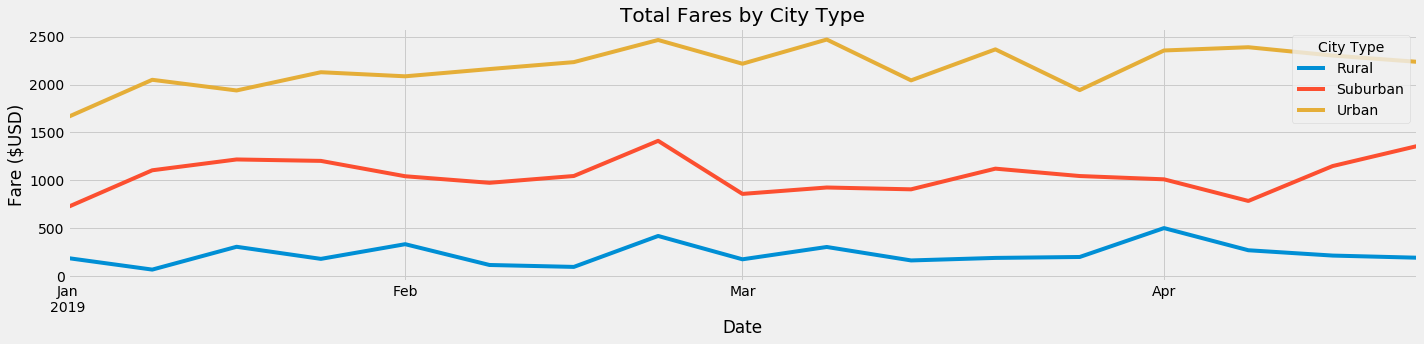

In [252]:
# Plot the data in a line chart
plt.style.use('fivethirtyeight')
multi_plot = pyber_resample_df.plot(kind="line", figsize=(20,5), grid=True, title="Total Fares by City Type")
plt.ylabel("Fare ($USD)")



plt.tight_layout()
plt.savefig("analysis/PyBer_Challenge.png")
plt.show()